# Home
<div class="markdown-google-sans">
  <h1>MarketPulse AI</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore MarketPulse AI</h2>

---

  <p>A Notebook application that combines stock price data and recent news analysis for selected companies. It pulls real-time financial data from Tiingo and relevant stock-specific news from Finnhub, then uses an LLM (OpenAI API) to provide concise summaries and sentiment analysis.
  </p>
</div>


# Step 1: Notebook Setup and Imports







In [ ]:
# Install required libraries if not already installed
!pip install openai

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os


# Step 2: Configuration


In [ ]:
# API Keys - You can also replace these with your own keys
TIINGO_API_KEY = 'placeholder_key'
FINNHUB_API_KEY = 'placeholder_key'

# Step 3: Data Fetching Functions

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we’ll create functions to:</p>
  <ol>
    <li>
      Retrieve stock data from Alpha Vantage.
    </li>
    <li>
      Fetch recent news articles from Finnhub related to a specific stock symbol.
    </li>
  </ol>
  

</div>







<strong>Function to Fetch Stock Data</strong>
<p>This function will use Tiingo to get the latest stock data for a given symbol.</p>





In [ ]:
# Function to fetch the past year of stock data from Tiingo
def get_stock_data_tiingo(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")
        url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={TIINGO_API_KEY}"

        response = requests.get(url)
        data = response.json()

        if response.status_code == 200 and data:
            # Convert JSON response to DataFrame
            df = pd.DataFrame(data)
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            print("Data fetched!")

            # Calculate 20-day and 50-day moving averages
            df['avg_20_day'] = df['close'].rolling(window=20).mean()
            df['avg_50_day'] = df['close'].rolling(window=50).mean()

            # Add columns for closing price and standard deviation of closing prices
            df['closing_price'] = df['close']
            df['std_dev'] = df['close'].std()

            # Forward fill and backward fill NaN values in moving averages
            df[['avg_20_day', 'avg_50_day']] = df[['avg_20_day', 'avg_50_day']].ffill().bfill()

            # Select only the columns we need
            df = df[['closing_price', 'std_dev', 'avg_20_day', 'avg_50_day']]
            df.reset_index(inplace=True)  # Move date back to a column if you want

            return df
        else:
            print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
            return None
    except Exception as e:
        print(f"Error fetching stock data for {symbol}: {str(e)}")
        return None

stock_symbol = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ").upper()

# Fetch stock data from Tiingo
stock_data = get_stock_data_tiingo(stock_symbol)

Enter the stock ticker symbol (e.g., AAPL for Apple): LMT
Data fetched!


<p>Plotting the chart:</p>

Stock data: 
                         date  closing_price    std_dev  avg_20_day  \
0   2023-11-07 00:00:00+00:00         450.15  56.339665    446.7025   
1   2023-11-08 00:00:00+00:00         444.66  56.339665    446.7025   
2   2023-11-09 00:00:00+00:00         442.46  56.339665    446.7025   
3   2023-11-10 00:00:00+00:00         444.87  56.339665    446.7025   
4   2023-11-13 00:00:00+00:00         445.03  56.339665    446.7025   
..                        ...            ...        ...         ...   
246 2024-10-30 00:00:00+00:00         545.94  56.339665    590.9270   
247 2024-10-31 00:00:00+00:00         546.05  56.339665    587.9385   
248 2024-11-01 00:00:00+00:00         545.35  56.339665    584.9495   
249 2024-11-04 00:00:00+00:00         543.10  56.339665    581.8275   
250 2024-11-05 00:00:00+00:00         546.75  56.339665    578.7625   

     avg_50_day  
0      450.1002  
1      450.1002  
2      450.1002  
3      450.1002  
4      450.1002  
..          ...  
246    5

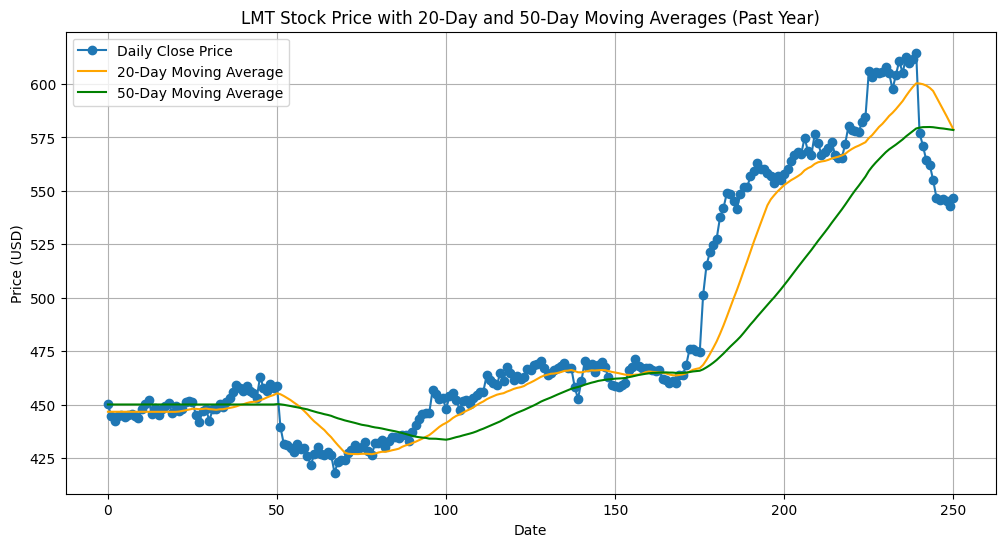

In [ ]:
# Function to plot stock data with moving averages
def plot_stock_data(df, symbol):
    plt.figure(figsize=(12, 6))

    # Plot the daily closing prices
    plt.plot(df.index, df['closing_price'], marker='o', linestyle='-', label='Daily Close Price')

    # Plot the 20-day and 50-day moving averages
    plt.plot(df.index, df['avg_20_day'], linestyle='-', label='20-Day Moving Average', color='orange')
    plt.plot(df.index, df['avg_50_day'], linestyle='-', label='50-Day Moving Average', color='green')

    # Plot formatting
    plt.title(f'{symbol} Stock Price with 20-Day and 50-Day Moving Averages (Past Year)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

if stock_data is not None:
    print("Stock data: ")
    print(stock_data)
    plot_stock_data(stock_data, stock_symbol)


<strong>Function to Fetch Stock News</strong>
<p>This function will use Finnhub to get the latest stock data for a given symbol.</p>


In [ ]:
# Function to fetch recent news articles from Finnhub
def get_news_articles_finnhub(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        url = f'https://finnhub.io/api/v1/company-news?symbol={symbol}&from={start_date}&to={end_date}&token={FINNHUB_API_KEY}'
        print(url)
        response = requests.get(url)
        articles = response.json()
        return articles
    except Exception as e:
        print(f"Exception occurred: {e}")
        return []

print(stock_symbol)
news_articles = get_news_articles_finnhub(stock_symbol)
if news_articles:
    print(f"\nRecent News Articles for {stock_symbol}:\n")
    for article in news_articles[:10]:  # Show only the first 10 articles
        print(f"Title: {article['headline']}")
        print(f"Date: {article['datetime']}")
        print(f"Source: {article['source']}")
        print(f"URL: {article['url']}\n")
else:
    print("No recent news articles found.")

LMT
https://finnhub.io/api/v1/company-news?symbol=LMT&from=2024-10-07&to=2024-11-06&token=cskg0t1r01qn1f3vkhj0cskg0t1r01qn1f3vkhjg

Recent News Articles for LMT:

Title: VIS: Cyclical Industrials Show Momentum, Eyeing The Post-Election Landscape
Date: 1730841319
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=e856fb3a19a9f642b41e1affe5fd450c2479926693074804cf800ee3fa1723fa

Title: Lockheed Martin : The True GOATS of Wildfire Mitigation
Date: 1730808687
Source: Finnhub
URL: https://finnhub.io/api/news?id=9a90a022570c83a109a01fda27b4f8aec1bca78204a39d21d08ca7ccca732278

Title: Ariel Investments Focus Fund Q3 2024 Commentary
Date: 1730802600
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=3131d81373ebbea046a0db4591dfd37499d383502c94c49bf48aa12492e18915

Title: Drones In Defense: Reshaping Modern Warfare And Its Economics
Date: 1730801400
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=2c44f94a95013ee2f3b486cedb98462d59a85e7262a440593bc7dbc185c59462

Title: Marsh

# Step 4: LLM Integration with OpenAI API

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we will:</p>
  <ol>
    <li>
      Setup the OpenAI API client.
    </li>
    <li>
      Fetch the summary of our stock price and news data to get sentiment analysis from ChatGPT
    </li>
  </ol>

</div>






In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key='placeholder_key'
)
# Function to perform sentiment analysis and summarization using OpenAI API
def analyze_sentiment_with_openai(article_text):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Analyze the sentiment of this article and summarize it: {article_text}",
                }
            ],
            model="gpt-3.5-turbo",
        )
        sentiment_summary = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return sentiment_summary
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

sentiment_summary_list = []

for article in news_articles[:10]:
    # Convert timestamp to readable date format
    readable_date = datetime.utcfromtimestamp(article['datetime']).strftime('%Y-%m-%d %H:%M:%S')

    # Perform sentiment analysis and summarize with OpenAI
    sentiment_summary = analyze_sentiment_with_openai(article['summary'])
    formatted_summary = sentiment_summary.replace('. ', '.\n') if sentiment_summary else 'No summary available'


    # Define the parts separately
    title = f"Title: {article['headline']}\n"
    date = f"Date: {readable_date}\n"
    source = f"Source: {article['source']}\n"
    url = f"URL: {article['url']}\n"
    sentiment_summary_text = f"Sentiment Summary:\n {formatted_summary}\n"
    separator = '-' * 120 + '\n'

    # Combine all parts into one string
    article_summary = title + date + source + url + sentiment_summary_text + separator

    # Append the formatted string to the list
    sentiment_summary_list.append(article_summary)

# Combine all article summaries into a single string
news_summary = "\n".join(sentiment_summary_list)
print(news_summary)



Title: VIS: Cyclical Industrials Show Momentum, Eyeing The Post-Election Landscape
Date: 2024-11-05 21:15:19
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=e856fb3a19a9f642b41e1affe5fd450c2479926693074804cf800ee3fa1723fa
Sentiment Summary:
 The sentiment of this article is positive, as it recommends the Vanguard Industrials ETF (VIS) as a top buy for investors.
The article highlights the low cost, fair valuation, and strong diversification of VIS, making it an appealing option for investors.
------------------------------------------------------------------------------------------------------------------------

Title: Lockheed Martin : The True GOATS of Wildfire Mitigation
Date: 2024-11-05 12:11:27
Source: Finnhub
URL: https://finnhub.io/api/news?id=9a90a022570c83a109a01fda27b4f8aec1bca78204a39d21d08ca7ccca732278
Sentiment Summary:
 The sentiment of this article is positive and praises Lockheed Martin for their commitment to wildfire mitigation efforts.
It highlights their wo

<p>Now combining stock price data with the sentiment analysis:</p>

In [ ]:
def summarize_insights(stock_data, news_summary):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Generate a concise summary in bullet points for {stock_symbol}, incorporating insights from {stock_data} and {monthly_summary} (such as price trends, volume, and recent changes) and key takeaways from {news_summary} (highlighting any major announcements, market reactions, or industry trends). Focus on significant movements, potential reasons for those changes, and any notable impacts on the company or its sector.",
                }
            ],
            model="gpt-3.5-turbo",
        )
        summary_insight = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return summary_insight
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

print(summarize_insights(stock_data, news_summary))

- Lockheed Martin (LMT) stock price closed at $546.75 on November 5, 2024
- The 20-day moving average for LMT was $578.76, while the 50-day moving average was $578.46
- Recent news articles have highlighted positive sentiments towards Lockheed Martin's efforts in wildfire mitigation, missile defense technology, and defense collaborations
- Lockheed Martin has been recognized for its contributions to wildfire mitigation, missile defense technology, and national security applications
- Positive market sentiments towards American defense stocks, such as Lockheed Martin, indicate potential growth opportunities in the defense industry due to geopolitical factors
- Lockheed Martin's successful integration tests of defense systems showcase advancements in military technology, positioning them as a key player in the defense sector
